
## A. Introduction
### 2. KNN en exemple

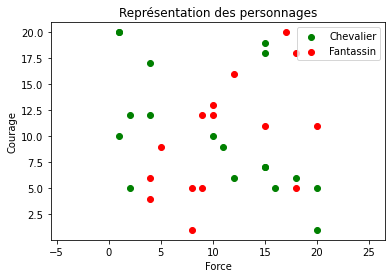

In [1]:
import pandas
import matplotlib.pyplot as plt

perso=pandas.read_csv("personnages.csv")
x=perso.loc[:,"Force"]
y=perso.loc[:,"Courage"]
lab=perso.loc[:,"Type"]

plt.axis('equal')
plt.title('Représentation des personnages')
plt.xlabel('Force')
plt.ylabel('Courage')
plt.scatter(x[lab == 'Chevalier'], y[lab == 'Chevalier'], color='g', label='Chevalier')
plt.scatter(x[lab == 'Fantassin'], y[lab == 'Fantassin'], color='r', label='Fantassin')

plt.legend()
plt.show()

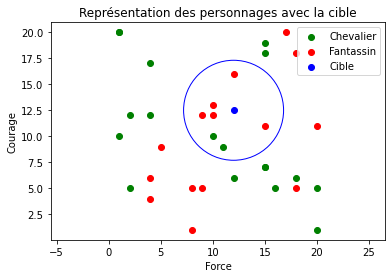

In [2]:
import pandas
import matplotlib.pyplot as plt

perso=pandas.read_csv("personnages.csv")
x=perso.loc[:,"Force"]
y=perso.loc[:,"Courage"]
lab=perso.loc[:,"Type"]

plt.axis('equal')
plt.title('Représentation des personnages avec la cible')
plt.xlabel('Force')
plt.ylabel('Courage')

plt.scatter(x[lab == 'Chevalier'], y[lab == 'Chevalier'], color='g', label='Chevalier')
plt.scatter(x[lab == 'Fantassin'], y[lab == 'Fantassin'], color='r', label='Fantassin')
plt.scatter(12, 12.5, color='b', label='Cible')
plt.scatter(12, 12.5, s=10000, edgecolor = 'blue', c='none' )

plt.legend()
plt.show()

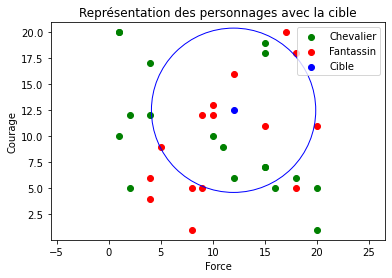

In [3]:
import pandas
import matplotlib.pyplot as plt

perso=pandas.read_csv("personnages.csv")
x=perso.loc[:,"Force"]
y=perso.loc[:,"Courage"]
lab=perso.loc[:,"Type"]

plt.axis('equal')
plt.title('Représentation des personnages avec la cible')
plt.xlabel('Force')
plt.ylabel('Courage')

plt.scatter(x[lab == 'Chevalier'], y[lab == 'Chevalier'], color='g', label='Chevalier')
plt.scatter(x[lab == 'Fantassin'], y[lab == 'Fantassin'], color='r', label='Fantassin')
plt.scatter(12, 12.5, color='b', label='Cible')
plt.scatter(12, 12.5, s=27000, edgecolor = 'blue', c='none' )

plt.legend()
plt.show()

## B. L'algorithme

### Exemple d'utilisation de la fonction `k_plus_proches_voisins(table, cible, k)` 

In [1]:
# On peut utiliser des listes ou des dictionnaires
table = [['t1',1,28], ['t1',3,27.2], ['t1',8,37.6], ['t1',13,40.7], ['t2',2,30], ['t2',3,26], ['t2',10,39], ['t2',15,35.5]]
# 't1' représente le type 1
# 't2' représente le type 2
# La première valeur numérique correspond à la valeur de la caractéristique 1
# La deuxième valeur numérique correspond à la valeur de la caractéristique 2

# Caractéristiques 1 et 2 de la cible
cible = [7,28.4]

# Valeur de k 
k=3

def k_plus_proches_voisins(table, cible, k) :
    """Renvoie la liste des k plus proches voisins de la cible"""
    
    def distance_cible(donnee) :
        """ renvoie la distance entre la donnée et la cible"""
        distance = abs(donnee[1]-cible[0])+abs(donnee[2]-cible[1])      
        return distance
    
    table_triee = sorted(table, key = distance_cible) # La fonction distance_cible est appliquée sur chaque élément de table avant de trier

    proches_voisins = [] # Liste contenant les k plus proches voisins
    
    for i in range(k) : 
        proches_voisins.append(table_triee[i]) 
    return proches_voisins


k_plus_proches_voisins(table,cible,k)

[['t1', 3, 27.2], ['t1', 1, 28], ['t2', 3, 26]]

### Application avec l'exemple des personnages

In [2]:
import pandas

perso = pandas.read_csv("personnages.csv")
table = list(zip(perso.loc[:,"Type"], perso.loc[:,"Force"], perso.loc[:,"Courage"]))
cible = [12, 12.5]
k=7

k_plus_proches_voisins(table,cible,k)

[('Fantassin', 10, 13),
 ('Fantassin', 10, 12),
 ('Fantassin', 9, 12),
 ('Fantassin', 12, 16),
 ('Chevalier', 11, 9),
 ('Chevalier', 10, 10),
 ('Fantassin', 15, 11)]

In [10]:
from collections import Counter

Counter(k_plus_proches_voisins(table,cible,k)).most_common(1)[0][0][0]

'Fantassin'